# Anayse exploratoire pour la classification des vehicules à l'aide de la fusion des fichiers clients et des immatriculations

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import matplotlib.cm as cm
import plotly.express as px
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D

In [2]:
warnings.simplefilter(action='ignore')
plt.rc("font", size=14)
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

## Chargement des données

In [3]:
# Données d'immatriculations
clients_immatriculations:pd.DataFrame = None
with open("data_processed/fusion_clients_immatriculations2.pkl","rb") as f1:
    clients_immatriculations = pickle.load(f1)
clients_immatriculations.head(5)

,age,sexe,taux,nbEnfantsAcharge,situationFamiliale,2emevoiture,categorie_label,categorie
0,49,F,914,1,En Couple,False,2,Familliale
1,18,M,563,4,En Couple,False,1,Haut de gamme
2,82,M,417,0,Célibataire,False,3,Economique
3,72,M,442,4,En Couple,False,1,Haut de gamme
4,41,M,592,0,Célibataire,False,4,Moyen


In [4]:
clients_immatriculations.describe()

,age,taux,nbEnfantsAcharge,categorie_label
count,196604.000000,196604.000000,196604.000000,196604.000000
mean,43.744166,608.900470,1.249858,2.131925
std,18.293112,335.818226,1.387122,1.395993
min,18.000000,150.000000,0.000000,0.000000
25%,28.000000,421.000000,0.000000,1.000000
50%,42.000000,522.000000,1.000000,2.000000
75%,57.000000,827.000000,2.000000,3.000000
max,84.000000,1399.000000,4.000000,4.000000


In [13]:
clients_immatriculations.shape

(196604, 8)

In [12]:
with open("data_processed/clustering_vehicules.categories_map_kmeans.pkl","rb") as f1:
    categories_map = pickle.load(f1)
categories_labels = list(categories_map.values())

In [4]:
display(categories_map)
categories_labels

{0: 'Citadine',
 1: 'Luxe',
 2: 'Haut de gamme',
 3: 'Economique',
 4: 'Familliale'}

['Citadine', 'Luxe', 'Haut de gamme', 'Economique', 'Familliale']

## Analyse exploratoire

### Visualisation

Visualisation de la distribution des variables.

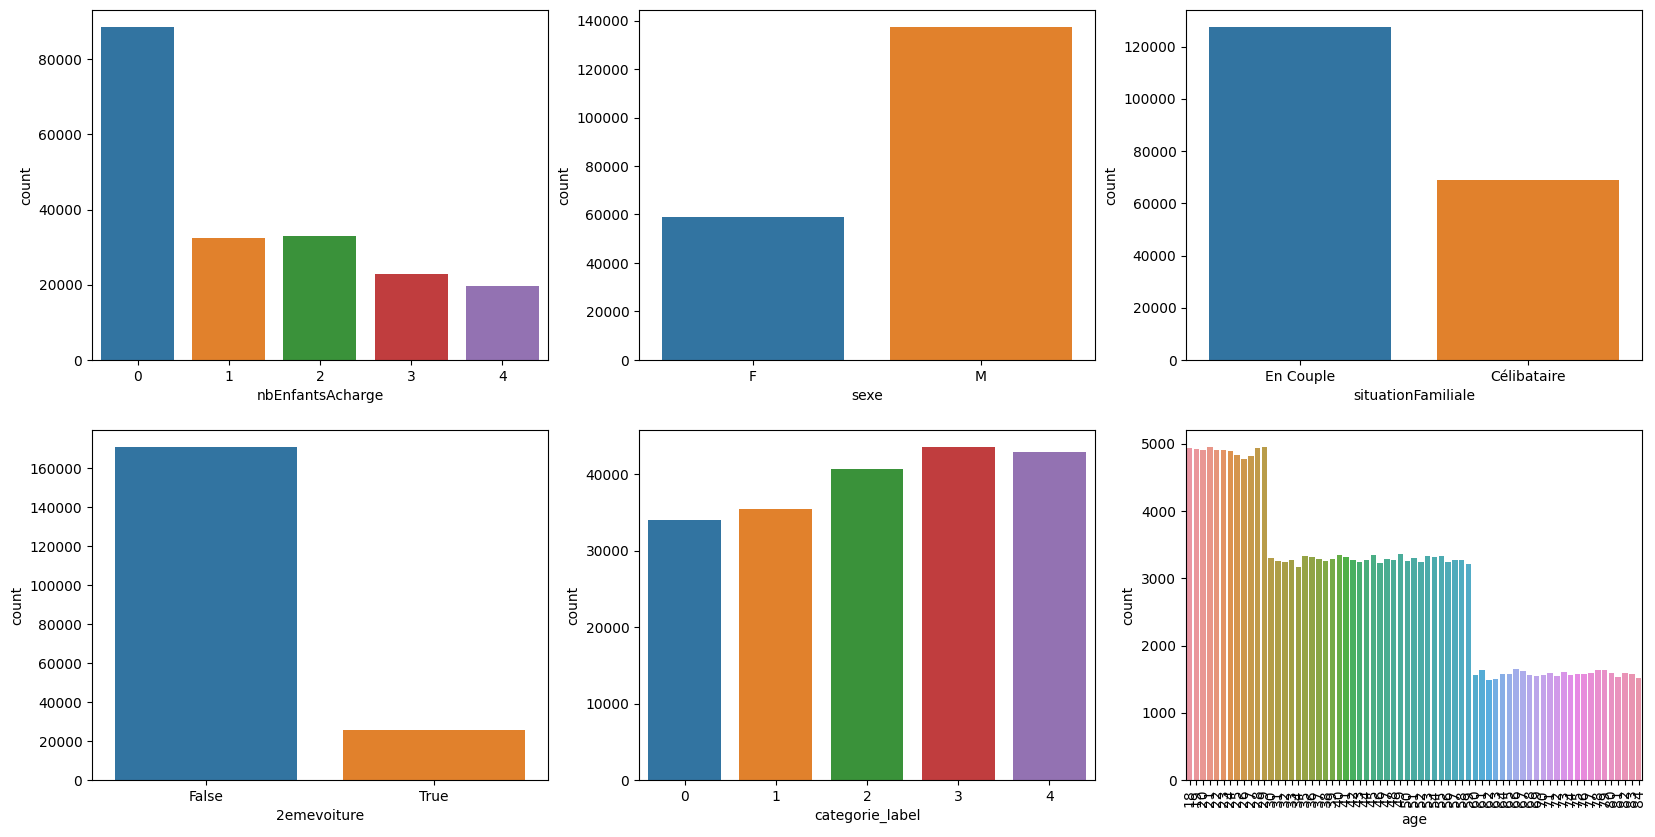

In [5]:
_, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(20, 10))
sns.countplot(data=clients_immatriculations,x="nbEnfantsAcharge",ax=axs[0,0])
sns.countplot(data=clients_immatriculations,x="age",ax=axs[1,2])
sns.countplot(data=clients_immatriculations,x="sexe",ax=axs[0,1])
sns.countplot(data=clients_immatriculations,x="situationFamiliale",ax=axs[0,2])
sns.countplot(data=clients_immatriculations,x="2emevoiture",ax=axs[1,0])
sns.countplot(data=clients_immatriculations,x="categorie_label",ax=axs[1,1])
plt.xticks(rotation=90)
plt.show()

In [13]:
categories_labels = list(categories_map.values())

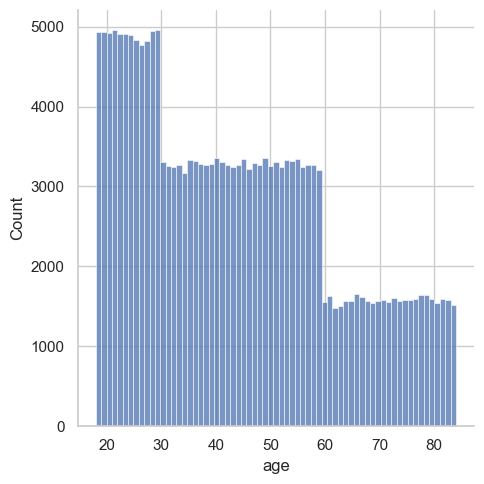

In [14]:
sns.displot(data=clients_immatriculations,x="age")

### Catégorie des vehicules en fonction de l'age

In [6]:
clients_immatriculations01 = clients_immatriculations.copy()
clients_immatriculations01.loc[(clients_immatriculations01.age >= 18) & (clients_immatriculations01.age <= 30),"age_label"] = "1_jeune adulte"
clients_immatriculations01.loc[(clients_immatriculations01.age >= 31) & (clients_immatriculations01.age <= 60),"age_label"] = "2_adultes"
clients_immatriculations01.loc[clients_immatriculations01.age >= 61,"age_label"] = "3_personne agée"

clients_immatriculations01.loc[(clients_immatriculations01.age >= 18) & (clients_immatriculations01.age <= 30),"age_code"] = 0
clients_immatriculations01.loc[(clients_immatriculations01.age >= 31) & (clients_immatriculations01.age <= 60),"age_code"] = 1
clients_immatriculations01.loc[clients_immatriculations01.age >= 61,"age_code"] = 2

clients_immatriculations01["est_age"] = np.where(clients_immatriculations01.age > 59, 1, 0)
clients_immatriculations01["en_couple"] = np.where(clients_immatriculations01.situationFamiliale == "En Couple", 1, 0)

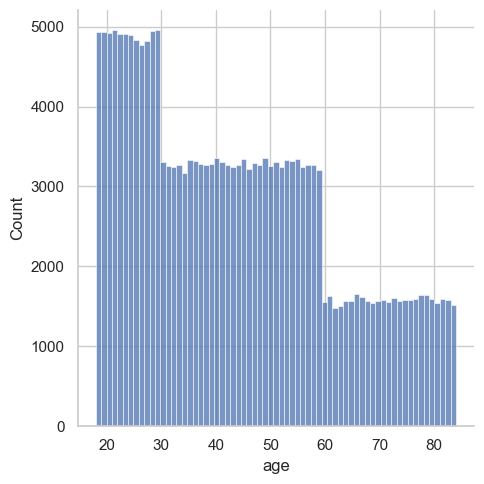

In [15]:
sns.displot(data=clients_immatriculations01,x="age")

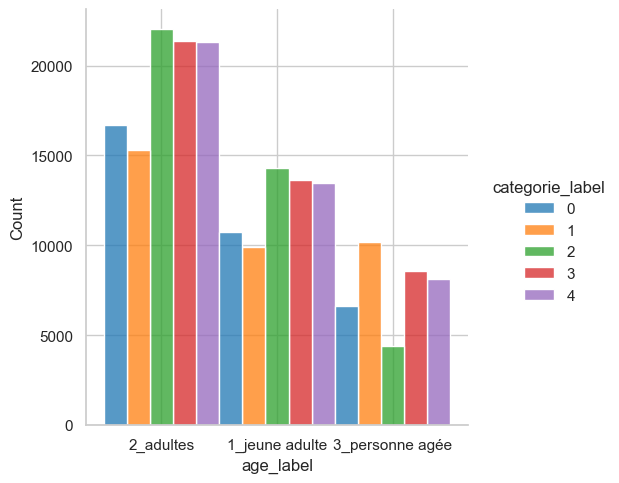

In [16]:
sns.displot(data=clients_immatriculations01,x="age_label",hue="categorie_label",multiple="dodge",palette="tab10")

### Catégorie des vehicules en fonction de la situation familiale

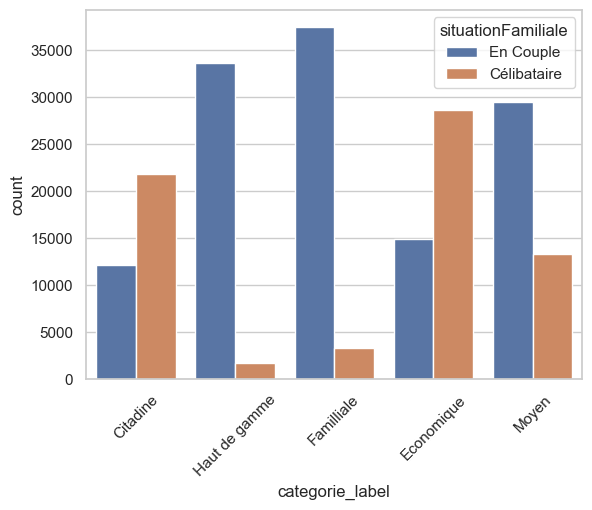

In [17]:
ax = sns.countplot(data=clients_immatriculations,x="categorie_label",hue="situationFamiliale")
ax.set_xticklabels(labels = categories_labels)
plt.xticks(rotation=45)
plt.show()

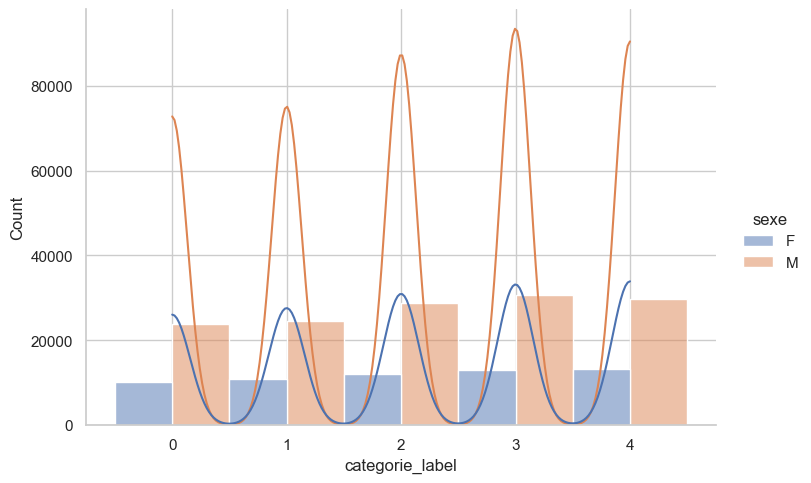

In [18]:
ax = sns.displot(data=clients_immatriculations,x="categorie_label",hue="sexe",kde=True,discrete=True,multiple="dodge",aspect=1.5)
plt.show()

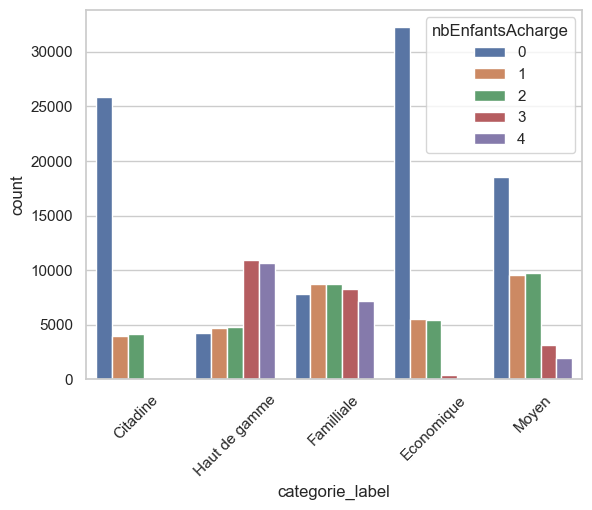

In [19]:
ax = sns.countplot(data=clients_immatriculations,x="categorie_label",hue="nbEnfantsAcharge")
ax.set_xticklabels(labels = categories_labels)
plt.xticks(rotation=45)
plt.show()

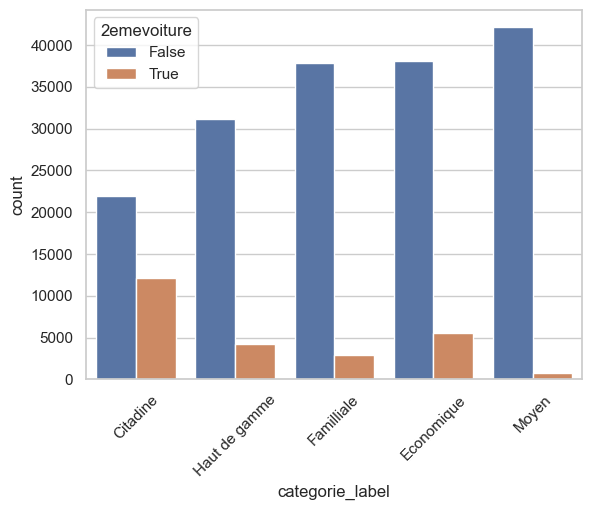

In [23]:
ax = sns.countplot(data=clients_immatriculations,x="categorie_label",hue="2emevoiture")
ax.set_xticklabels(labels = categories_labels)
plt.xticks(rotation=45)
plt.show()

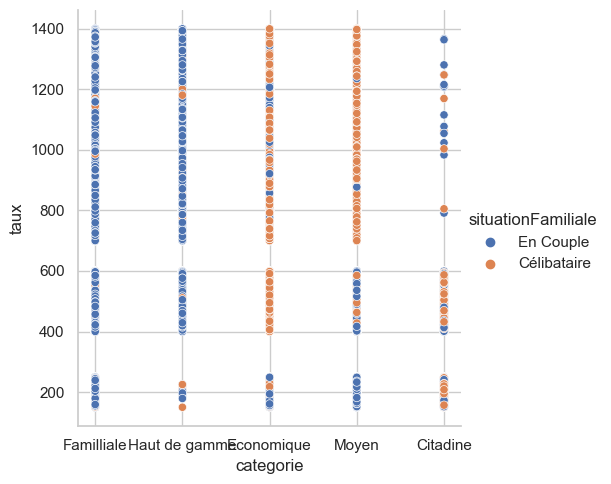

In [21]:
ax = sns.relplot(data=clients_immatriculations,x="categorie",y="taux",hue="situationFamiliale")
plt.show()

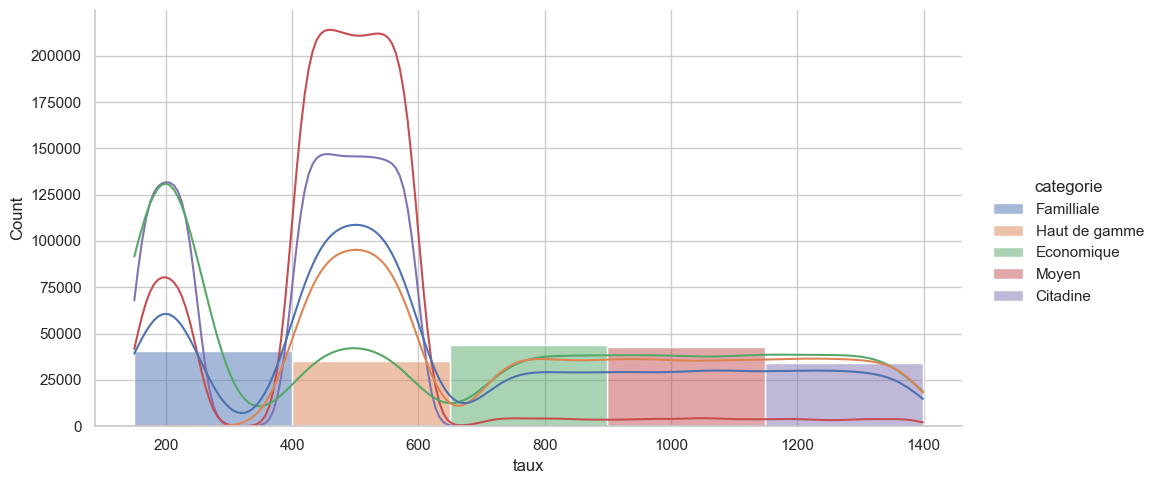

In [22]:
ax = sns.displot(data=clients_immatriculations,x="taux",bins=1,hue="categorie",aspect=2,multiple="dodge",kde=True)
plt.show()

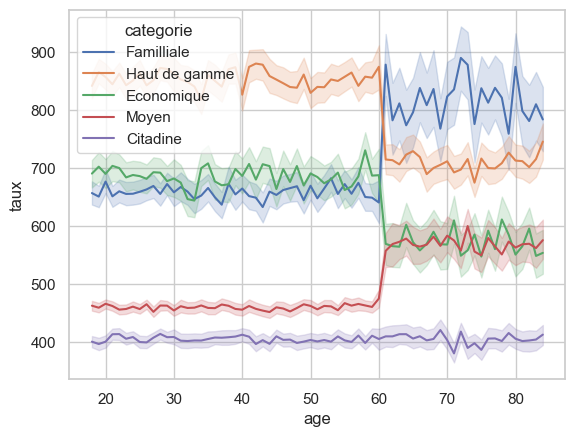

In [24]:
ax = sns.lineplot(data=clients_immatriculations,x="age",y="taux",hue="categorie")
plt.show()

In [26]:
#ax = sns.displot(data=clients_immatriculations01,x="categorie",hue="is_old_person",multiple="dodge")
#plt.show()

**Tirer les conclusions et donner la suite du plan (Entrainement avec ML FLOW + Schema) Préciser l'archicture MLLOW. Important préciser les artifacts obtenu lors de cette étape**

<Axes: >

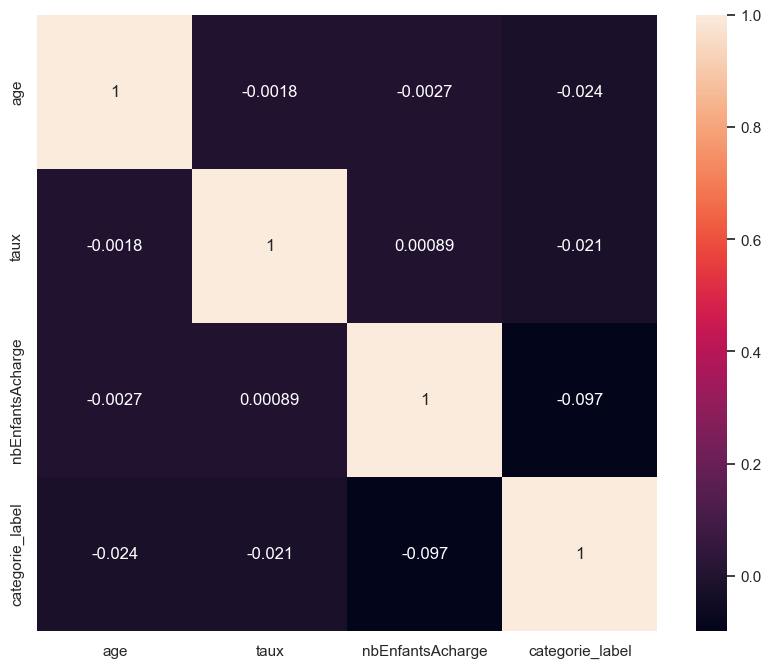

In [27]:
d = clients_immatriculations[["age","sexe","taux","nbEnfantsAcharge","categorie_label"]]
plt.figure(figsize=(10,8))
sns.heatmap(d.corr(),annot=True)

#### Enregistrenement du DataFrame avec Pickle

L'exploration etant terminée on enregistre le DataFrame final avec les label

In [12]:
clients_immatriculations.head()

,age,sexe,taux,nbEnfantsAcharge,situationFamiliale,2emevoiture,categorie_label,categorie
0,49,F,914,1,En Couple,False,2,Haut de gamme
1,18,M,563,4,En Couple,False,1,Luxe
2,82,M,417,0,Célibataire,False,3,Economique
3,72,M,442,4,En Couple,False,1,Luxe
4,41,M,592,0,Célibataire,False,4,Familliale


In [28]:
clients_immatriculations.dtypes

age                    int64
sexe                  object
taux                   int64
nbEnfantsAcharge       int64
situationFamiliale    object
2emevoiture             bool
categorie_label        int32
categorie             object
dtype: object

In [30]:
clients_immatriculations3 = clients_immatriculations.copy()

In [31]:
clients_immatriculations3["age"] = clients_immatriculations3["age"].astype(np.int64)
clients_immatriculations3["2emevoiture"] = clients_immatriculations3["2emevoiture"].astype(bool)
clients_immatriculations3["nbEnfantsAcharge"] = clients_immatriculations3["nbEnfantsAcharge"].astype(np.int64)
clients_immatriculations3["taux"] = clients_immatriculations3["taux"].astype(np.int64)

In [32]:
clients_immatriculations3.dtypes

age                    int64
sexe                  object
taux                   int64
nbEnfantsAcharge       int64
situationFamiliale    object
2emevoiture             bool
categorie_label        int32
categorie             object
dtype: object

In [33]:
list(clients_immatriculations3.columns)

['age',
 'sexe',
 'taux',
 'nbEnfantsAcharge',
 'situationFamiliale',
 '2emevoiture',
 'categorie_label',
 'categorie']

In [34]:
import pickle
import json

In [37]:
# Enregistrement du DataFrame
with open('data_processed/clients_vehicules3.pkl', 'wb') as f1:
    pickle.dump(clients_immatriculations3, f1)

# Enregistrement de dictionnaire de mapping des labels
with open('data_processed/clients_vehicules.label_dict3.pkl', 'wb') as f1:
    pickle.dump(categories_map, f1)

In [38]:
# Enregistrement de DataFrame au format csv
clients_immatriculations3.to_csv("data_processed/clients_vehicules3.csv")

# Enregistrement de mapper au format json
with open('data_processed/clients_vehicules.label_dict3.json', 'w') as f1:
    f1.write(json.dumps(categories_map,indent=4))

**Decrire le ML OPS, les métriques et les schméa puis présenter un visuel de l'api avec Docker**

Pour l'entrainement du modèle nous allons utiliser les algorithme suivant :
* Arbre de décision
* RandomForest
* Regression Logisitique

Les métriques utilisée pour l'évaluation du modèle sera l'accuracy en raison de sa simplicité d'interprétation. 